<a href="https://colab.research.google.com/github/SoshJam/Jove-CS3100-UofU/blob/master/For_CS3100_Fall2024/11_CFG/ASSIGNMENT-6/u1431380_asg06_pdaRising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asg-6 Imports


In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6709, done.
remote: Counting objects: 100% (2075/2075), done.
remote: Compressing objects: 100% (826/826), done.
remote: Total 6709 (delta 1265), reused 1941 (delta 1169), pack-reused 4634 (from 1)
Receiving objects: 100% (6709/6709), 10.59 MiB | 15.49 MiB/s, done.
Resolving deltas: 100% (4270/4270), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

 "help(AnimatePDA)" gives you info on how to use animations with PDA 


# Question 1: 20 percent of the points

Add the "succ" operator as explained in  
https://github.com/ganeshutah/Jove/blob/master/For_CS3100_Fall2024/14_Calculator/Calculator_For_Asg6_Fall2024.ipynb
and submit the finished file named as uABCDEFG_asg06_Calculator.ipynb after running all the cells

# Question 2: 30 percent of the points

## Do the problems in  RE2_NFA_PT.ipynb in 11_CFG. Name that finished file uABCDEFG_asg06_RE2_NFA_PT.ipynb and submit

# Question 3: 50 percent of the points

### Design a PDA for the CFG for #1 > #0 ... but this PDA must be obtained via a CFG first, and then CFG to PDA conversion -- and NOT by directly designing as a PDA

### Neatly document your CFG design below. Say how each production rule was obtained

# Submit this file which should be named uABCDEFG_asg06_pdaRising.ipynb

## Note that due to a quirk of Colab, the file name may appear to be u0000000_asg04.ipynb . When you save it, make sure that the name is uABCDEFG_asg06_pdaRising.ipynb

### Given test cases:

In [ ]:
pdaRising = md2mc('''PDA

!! CFG basic idea: For every 0 we add, we have to add AT LEAST one 1 to go with it
!! Could it just be this?
!! E -> 1         !! terminate with a 1
!!    | E 0 E 1 E !! add a 0 and at least one 1
!!    | E 1 E 0 E !! another way to do that
!!    | E 1 E     !! adding a one with the possibility for more
!!    | ''        !! terminate with an empty string
!! but then with this

!!-- THE CFG YOU OBTAINED
!!-- F -> E 1 E                   !! guarantee final product has more 1s than 0s, and add Expressions
!!-- E -> T | S                   !! an Expression can be an allowed terminal, or a statement that adds one 0 and one or more 1s.
!!-- S -> 0 E 1 | 1 E 0           !! we ensure #1 > #0 by starting the string with a 1, so adding 1 of each is just fine. Make sure to expand with another E in the middle.
!!-- T -> '' | 1 | F              !! terminate, or add a 1 (because we can add as many 1s as we want), or even just restart with another full string (because it will still have more 1s than 0s)
!!-- END OF CFG

!!-- The PDA rules are below.

!! Basic states (Assume stack starts with # as bottom character)
I : '' , '' ; F  -> W   !! Push Start state onto the stack and go to Work state, starting with production F
W : '' , #  ; '' -> F   !! From Work state, if we empty the stack, go to accept state

!! Read terminals
W : 0 , 0 ; '' -> W   !! Just return to the Work state when we do
W : 1 , 1 ; '' -> W

!! Rules for production F -> E 1 E
W : '' , F ; E1E -> W   !! Consume the F from the stack and add the rule, then return to Work state

!! Repeat for other production rules

!! Rules for E -> T | S | EE
W : '' , E  ; T  -> W
W : '' , E  ; S  -> W
W : '' , E  ; EE -> W

!! Rules for S -> 0 1 | 1 0
W : '' , S ; 0E1 -> W
W : '' , S ; 1E0 -> W

!! Rules for T -> '' | 1 | F
W : '' , T ; '' -> W
W : '' , T ; 1  -> W
W : '' , T ; F  -> W
'''
)

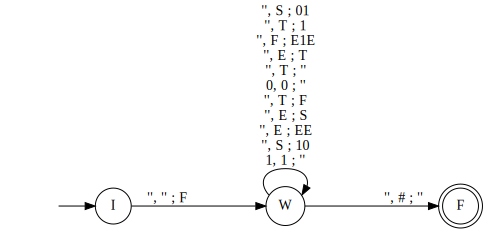

In [11]:
dotObj_pda(pdaRising, FuseEdges=True)

In [ ]:

explore_pda("1101111", pdaRising, STKMAX=7)  # increase STKMAX as needed

In [ ]:
explore_pda("1101110", pdaRising, STKMAX=7)  # increase STKMAX as needed

In [15]:
# correctly rejected
explore_pda("0011011100", pdaRising, STKMAX=7) # increase STKMAX as needed

String 0011011100 rejected by your PDA :-(
Visited states are:
{('W', '0011011100', '11EE1E#'), ('W', '0011011100', '10E1E1E#'), ('W', '0011011100', 'TE1E1E#'), ('W', '0011011100', 'TEE1E1E#'), ('W', '0011011100', 'TEEEE1E#'), ('W', '011011100', '1EEE1E#'), ('W', '0011011100', '10E1E#'), ('W', '0011011100', '01EEE1E#'), ('W', '0011011100', 'E1E1E1E#'), ('W', '0011011100', 'S1E#'), ('W', '011011100', '11E#'), ('W', '0011011100', '011E#'), ('W', '0011011100', '011EE1E#'), ('W', '0011011100', 'EEEE1E#'), ('W', '0011011100', 'FEE1E#'), ('W', '0011011100', '11EEE1E#'), ('W', '0011011100', 'F#'), ('W', '0011011100', '1E1E1E#'), ('W', '0011011100', 'SEE1E#'), ('W', '0011011100', '01EE1E#'), ('W', '0011011100', 'T1E#'), ('W', '0011011100', 'E1E#'), ('W', '0011011100', 'E1EEE1E#'), ('W', '0011011100', '1EE1E#'), ('W', '0011011100', '10EE1E#'), ('W', '0011011100', '1E1E#'), ('W', '0011011100', 'EEE1E#'), ('W', '0011011100', '11E1E1E#'), ('W', '0011011100', 'FE1EE1E#'), ('W', '011011100', '11EE1E

In [22]:
explore_pda("00110111001", pdaRising, STKMAX=7) # increase STKMAX as needed

String 00110111001 accepted by your PDA in 5 ways :-) 
Here are the ways: 
Final state  ('F', '', '')
Reached as follows:
->  ('I', '00110111001', '#')
->  ('W', '00110111001', 'F#')
->  ('W', '00110111001', 'E1E#')
->  ('W', '00110111001', 'EE1E#')
->  ('W', '00110111001', 'EEE1E#')
->  ('W', '00110111001', 'SEE1E#')
->  ('W', '00110111001', '0E1EE1E#')
->  ('W', '0110111001', 'E1EE1E#')
->  ('W', '0110111001', 'S1EE1E#')
->  ('W', '0110111001', '0E11EE1E#')
->  ('W', '110111001', 'E11EE1E#')
->  ('W', '110111001', 'T11EE1E#')
->  ('W', '110111001', '11EE1E#')
->  ('W', '10111001', '1EE1E#')
->  ('W', '0111001', 'EE1E#')
->  ('W', '0111001', 'SE1E#')
->  ('W', '0111001', '0E1E1E#')
->  ('W', '111001', 'E1E1E#')
->  ('W', '111001', 'T1E1E#')
->  ('W', '111001', '1E1E#')
->  ('W', '11001', 'E1E#')
->  ('W', '11001', 'S1E#')
->  ('W', '11001', '1E01E#')
->  ('W', '1001', 'E01E#')
->  ('W', '1001', 'S01E#')
->  ('W', '1001', '1E001E#')
->  ('W', '001', 'E001E#')
->  ('W', '001', 'T001E#')

In [19]:
explore_pda("00111", pdaRising, STKMAX=7) # increase STKMAX as needed

String 00111 rejected by your PDA :-(
Visited states are:
{('W', '00111', '1EEE1E#'), ('W', '00111', '11E#'), ('W', '00111', 'T1EE1E#'), ('W', '00111', 'EE1E#'), ('W', '00111', 'T1EEE1E#'), ('W', '00111', '1EE1E1E#'), ('W', '0111', '1E1E1E#'), ('W', '00111', 'S1EE1E#'), ('W', '00111', 'FEEEE1E#'), ('W', '0111', '1EE1E#'), ('W', '0111', '1E1E#'), ('W', '00111', 'FEE1E1E#'), ('W', '00111', 'FEEE1E#'), ('W', '00111', '1E#'), ('W', '00111', '011E1E#'), ('W', '00111', 'SEE1E1E#'), ('W', '00111', 'EEEEE1E#'), ('W', '00111', '01E1E#'), ('W', '00111', 'TE1E#'), ('W', '00111', '11EE1E#'), ('W', '00111', '10E1E1E#'), ('W', '00111', 'TE1E1E#'), ('W', '00111', 'TEE1E1E#'), ('W', '00111', 'TEEEE1E#'), ('W', '00111', '10E1E#'), ('W', '00111', '01EEE1E#'), ('W', '00111', 'E1E1E1E#'), ('W', '00111', 'S1E#'), ('W', '00111', 'SE1EE1E#'), ('W', '00111', '011E#'), ('W', '00111', '101E1E#'), ('W', '00111', 'FE1E#'), ('W', '00111', 'F1E1E#'), ('W', '00111', 'S1EEE1E#'), ('W', '00111', '011EE1E#'), ('W', '00

In [20]:
explore_pda("0011100111", pdaRising, STKMAX=7) # increase STKMAX as needed

String 0011100111 rejected by your PDA :-(
Visited states are:
{('W', '0011100111', 'SE1E#'), ('W', '0011100111', 'FEEE1E#'), ('W', '0011100111', '1E#'), ('W', '0011100111', 'SEE1E1E#'), ('W', '0011100111', 'SEEEE1E#'), ('W', '0011100111', '10EEE1E#'), ('W', '0011100111', '01E1E#'), ('W', '0011100111', '11EE1E#'), ('W', '0011100111', '10E1E1E#'), ('W', '0011100111', 'TE1E1E#'), ('W', '0011100111', '01E1E1E#'), ('W', '0011100111', 'TEE1E1E#'), ('W', '0011100111', '01EEE1E#'), ('W', '0011100111', 'E1E1E1E#'), ('W', '0011100111', '011E#'), ('W', '0011100111', 'F1EE1E#'), ('W', '011100111', '1E1E1E#'), ('W', '0011100111', 'EEE1E1E#'), ('W', '0011100111', 'TE1EE1E#'), ('W', '0011100111', 'F1E#'), ('W', '011100111', '1EE1E#'), ('W', '0011100111', 'EEEE1E#'), ('W', '011100111', '1E1E#'), ('W', '0011100111', 'FEE1E#'), ('W', '0011100111', 'T1E1E1E#'), ('W', '0011100111', '11EEE1E#'), ('W', '0011100111', 'T1E1E#'), ('W', '0011100111', '1E1E1E#'), ('W', '0011100111', 'SEE1E#'), ('W', '0011100111

# END
